In [ ]:
#استدعاء المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [ ]:
trin=pd.read_csv("/content/train.csv")
test=pd.read_csv('/content/test.csv')

In [ ]:
#استكشاف الداتا

In [ ]:
trin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
trin.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.775,NaN,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.500,C82,C


In [ ]:
trin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# لاحظ ان عمود cabin له تاثير على النجاه

In [ ]:
trin.shape

(891, 12)

In [ ]:
Dec=trin.describe()
Dec

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
mis=trin.isna().sum()
mis[mis>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

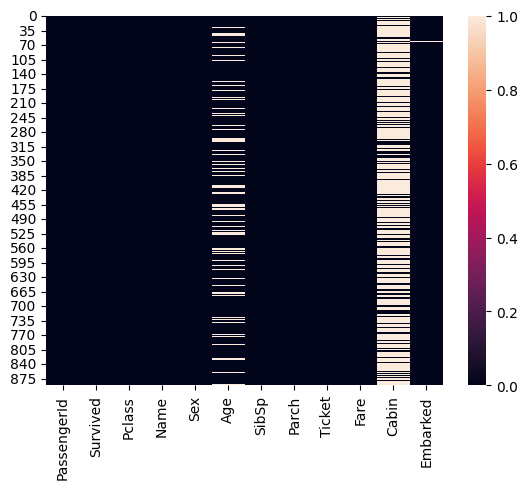

In [ ]:
sns.heatmap(trin.isna())

# Clean data

In [ ]:
def cleen(t):
 t.drop(['Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
 t.Age=t.Age.fillna(t.Age.median())
 return t

In [ ]:
cleen(trin)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


<Axes: >

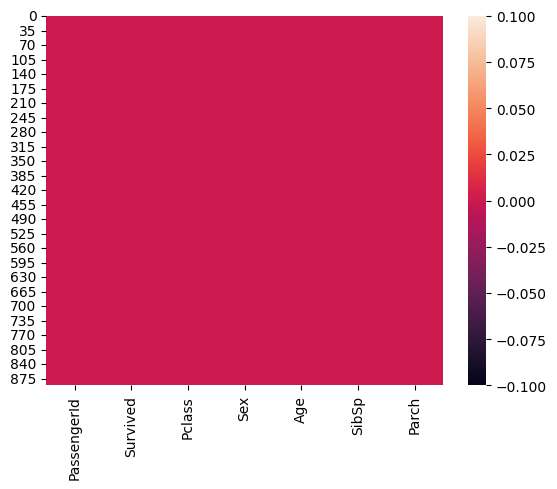

In [ ]:
sns.heatmap(trin.isna())

In [ ]:
trin.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [ ]:
cleen(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


# Analysis

In [ ]:
co=trin.corr()

<ipython-input-16-11e6fafbc407>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co=trin.corr()


<Axes: >

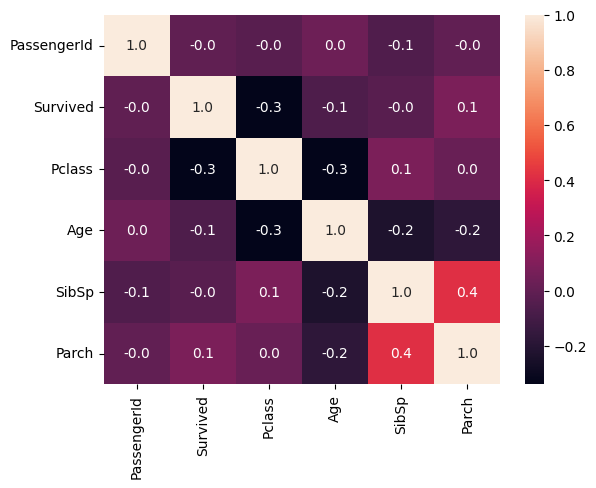

In [ ]:
sns.heatmap(co,annot=True,fmt='.1f')

In [ ]:
trin['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
trin['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

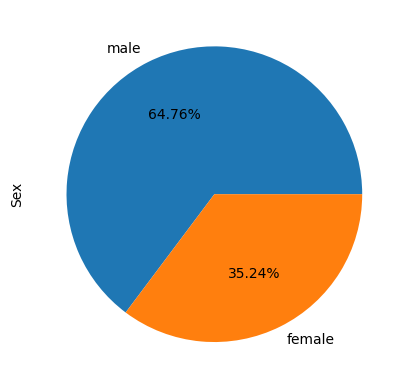

In [ ]:
trin['Sex'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

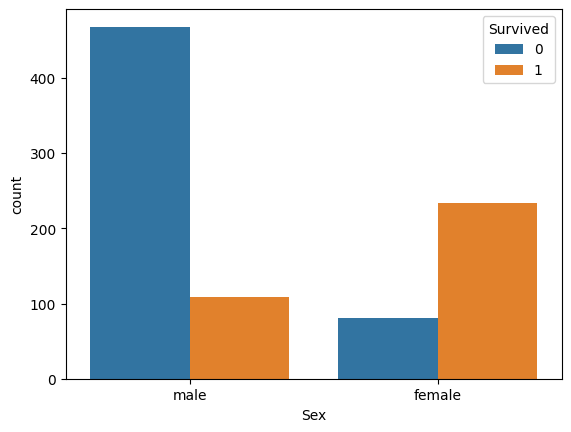

In [ ]:
sns.countplot(data=trin, x="Sex", hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

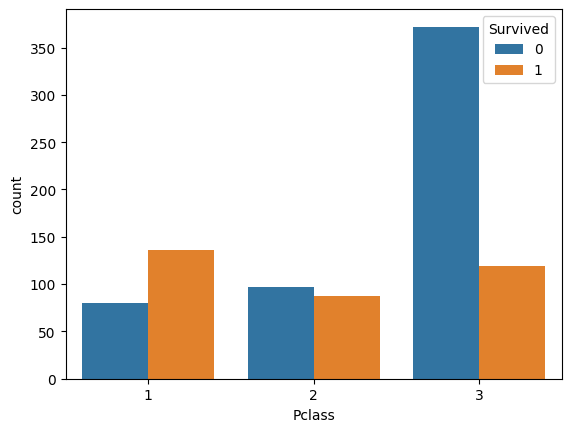

In [ ]:
sns.countplot(data=trin, x="Pclass", hue="Survived")

<Axes: xlabel='Age', ylabel='Count'>

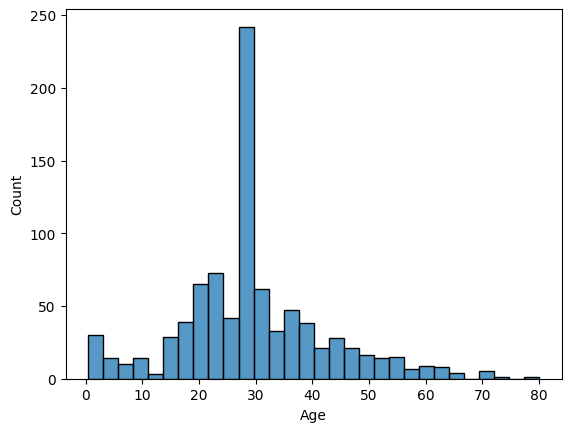

In [ ]:
sns.histplot(trin['Age'])

# TRNSFOR DATA

In [ ]:
trin['Sex']= pd.get_dummies(trin['Sex'],drop_first=True)
test['Sex']= pd.get_dummies(test['Sex'],drop_first=True)

In [ ]:
trin

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,28.0,1,2
889,890,1,1,1,26.0,0,0


In [ ]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0
414,1306,1,0,39.0,0,0
415,1307,3,1,38.5,0,0
416,1308,3,1,27.0,0,0


# bulid modling

# Modle 1

In [ ]:
x=trin[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]
y=trin[['Survived']]

In [ ]:
x_trin,x_test,y_trin,y_test=train_test_split(x,y,train_size=.8)

In [ ]:
Accurises=[]

In [ ]:
def all(modl):
  modl.fit(x_trin,y_trin)
  p=modl.predict(x_test)
  ac=accuracy_score(p,y_test)
  print("Accuracy",ac)
  Accurises.append(ac)




In [ ]:
m1=DecisionTreeClassifier()
all(m1)

Accuracy 0.7486033519553073


In [ ]:
m2=LogisticRegression()
all(m2)

Accuracy 0.7486033519553073


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
m3=RandomForestClassifier()
all(m3)

<ipython-input-29-647d990d6d77>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modl.fit(x_trin,y_trin)


Accuracy 0.7821229050279329


In [ ]:
m4=GradientBoostingClassifier()
all(m4)

Accuracy 0.7932960893854749


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
m5=KNeighborsClassifier()
all(m5)

Accuracy 0.4860335195530726


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
m6=GaussianNB()
all(m6)

Accuracy 0.7374301675977654


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
m7=SVC()
all(m7)

Accuracy 0.6368715083798883


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
algorthims=['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [ ]:
DF = pd.DataFrame({'Algorithm': algorthims, 'Accuracy': Accurises})

In [ ]:
DF

,Algorithm,Accuracy
0,DecisionTreeClassifier,0.748603
1,LogisticRegression,0.748603
2,RandomForestClassifier,0.782123
3,GradientBoostingClassifier,0.793296
4,KNeighborsClassifier,0.486034
5,GaussianNB,0.737430
6,SVC,0.636872


In [ ]:
modelX=GradientBoostingClassifier()
modelX.fit(x_trin,y_trin)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
Fpre=modelX.predict(test)

In [ ]:
final=test.PassengerId

In [ ]:
D1=pd.DataFrame({"PassengerId":final,"Survived":Fpre})

In [ ]:
D1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
D11=D1.to_csv("sumption.csv",index=False)
D11